In [3]:
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt

In [2]:
def extract_features(filename):
    features = np.empty((0,193))
    X, sample_rate = librosa.load(filename)
    stft = np.abs(librosa.stft(X))
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X), sr=sample_rate).T,axis=0)
    ext_features = np.hstack([mfccs,chroma,mel,contrast,tonnetz])
    features = np.vstack([features,ext_features])
    return features

In [24]:
def predict_sound(filepath, sound_file_path):
    emotions = ["Anger","Excitement","Fear","Joy","Relaxing","Sadness",
               "Surprise"]
    with tf.device('/cpu:0'):
        model = load_model(filepath, compile = True)
    
    sound = extract_features(sound_file_path)
    
    prediction = model.predict(sound)
    
    if len(prediction) == 0: 
        print ("No prediction")

    ind = np.argpartition(prediction[0], -2)[-2:]
    ind[np.argsort(prediction[0][ind])]
    ind = ind[::-1]
    
    emotion_result = ["Top guess: " + emotions[ind[0]], "2nd guess: " + emotions[ind[1]]]
    print("emotion_result: ", emotion_result)
    percentage_result = [round(prediction[0,ind[0]]*100,1), round(prediction[0,ind[1]]*100,1)]
    print("percentage_result: ", percentage_result)
    
    plt.bar(emotion_result, percentage_result)
    plt.title('Sound emotion prediction')
    plt.xlabel('Emotion')
    plt.ylabel('Prediction accuracy (%)')
    plt.text(0, round(prediction[0,ind[0]]*100,1) + 0.25, round(prediction[0,ind[0]]*100,1), fontweight = 'bold')
    plt.text(1, round(prediction[0,ind[1]]*100,1) + 0.25, round(prediction[0,ind[1]]*100,1), fontweight = 'bold')
    plt.savefig("output.png", format="png", dpi=400)
    plt.show()
    
    print ("Top guess: ", emotions[ind[0]], " (",round(prediction[0,ind[0]],3),")")
    print ("2nd guess: ", emotions[ind[1]], " (",round(prediction[0,ind[1]],3),")")

emotion_result:  ['Top guess: Anger', '2nd guess: Surprise']
percentage_result:  [27.2, 23.9]


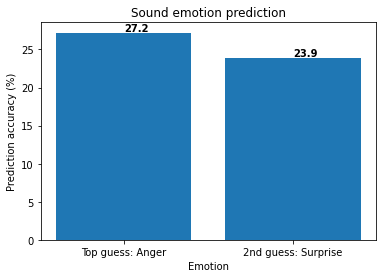

Top guess:  Anger  ( 0.272 )
2nd guess:  Surprise  ( 0.239 )


In [25]:
sound = 'input/shopping.wav'
model = 'best_MPLEmotions_model.h5'
predict_sound(model, sound)

In [ ]:
sound2 = 'input/hospital-corridor.wav'
predict_sound(model, sound2)

In [ ]:
sound3 = 'input/enviroment-hospital.wav'
predict_sound(model, sound3)

In [ ]:
sound4 = 'input/lo-fi-beat.wav'
predict_sound(model, sound4)

In [ ]:
sound5 = 'input/forest.wav'
predict_sound(model, sound5)

In [ ]:
sound6 = 'input/music_relax.wav'
predict_sound(model, sound6)